## Self-Supervised MultiModal Versatile Networks

### About the paper


*   __Title__:[Self-Supervised MutliModal Versatile Networks](https://proceedings.neurips.cc/paper/2020/hash/0060ef47b12160b9198302ebdb144dcf-Abstract.html)
*   __Published__:[Advances in Neural Information Processing Systems 33 (NeurIPS 2020)](https://proceedings.neurips.cc/paper_files/paper/2020)
*   __Authors__:Jean-Baptiste Alayrac, Adria Recasens, Rosalia Schneider, Relja Arandjelović, Jason Ramapuram, Jeffrey De Fauw, Lucas Smaira, Sander Dieleman, Andrew Zisserman





### Terminologies

#### MultiModal

* Multi-Many
* Modal - A particular for of sensory perception
* Multi-Modal - From different sensory perceptions

In case of machine learning, it means we process data aquired in different formats (usually related to each other) like text, audio, images, and video to perform analysis and build prediction models


##### Example of Multimodal data analysis

The following example show how multimodal data can be analysed together to extract meaningful relations and perform useful predictions.

In the following example, we use textual data to predict the price of a car. This is a cooked up example. It contains input in two formats,
1. Reviews about the car in **text format**,
2. Engine power which is in __numeric format__.

**Goal**: To predict the price of the car.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Mean Squared Error: 4234514.661885528


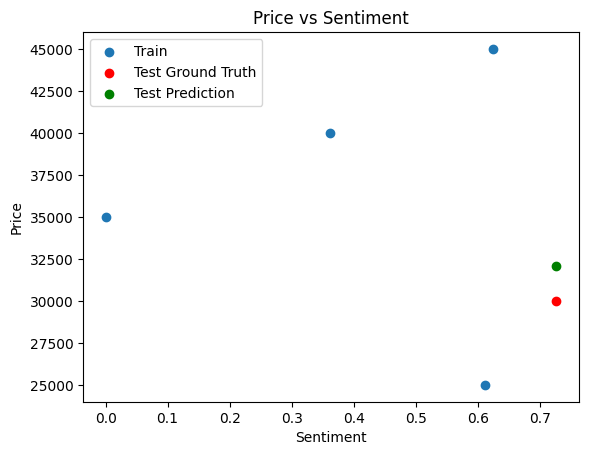

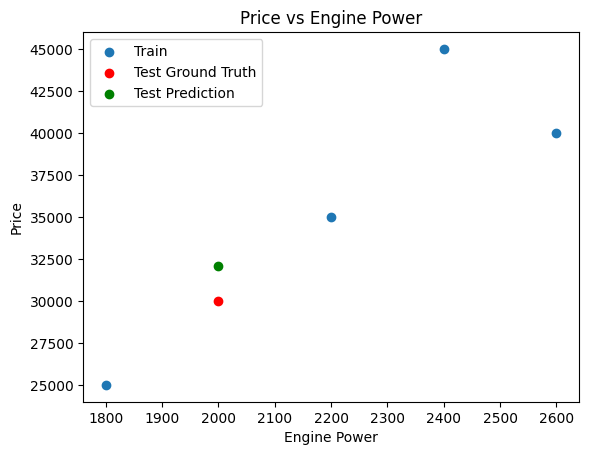

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Sample multimodal data (numerical and text)
data = {'Price': [25000, 30000, 35000, 45000, 40000],
        'Engine': [1800, 2000, 2200, 2400, 2600],
        'Review': ["Good car, drives well", "Excellent value for money", "Average performance, but reliable", "Luxury feel, great features", "Top-notch performance and comfort"]}

df = pd.DataFrame(data)

# Sentiment analysis on text data
analyzer = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Numerical data analysis (regression)
X = df[['Sentiment', 'Engine']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Visualization
plt.scatter(X_train['Sentiment'], y_train, label = 'Train')
plt.scatter(X_test['Sentiment'], y_test, color='red', label = 'Test Ground Truth')
plt.scatter(X_test['Sentiment'], predictions, color='green', label = 'Test Prediction')
plt.xlabel('Sentiment')
plt.ylabel('Price')
plt.title('Price vs Sentiment')
plt.legend()
plt.show()


# Visualization
plt.scatter(X_train['Engine'], y_train, label = 'Train')
plt.scatter(X_test['Engine'], y_test, color='red', label = 'Test Ground Truth')
plt.scatter(X_test['Engine'], predictions, color='green', label = 'Test Prediction')
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.title('Price vs Engine Power')
plt.legend()
plt.show()

#### **Observations**:
* For testing we have selected the second instance
* Remaining 4 are used for training

#### **Sentiment Analysis**:
>As the review of the test instance has the word "Excellent" which is a strong indicator of a positive sentiment, the sentiment analysis give a high score. This may increase the value of test instance

#### **Engine Power**:
> The Engine Power is low as compared to other that may drag down the predicted value of test instance

#### **Final word**:
> Using these two inputs from different format or sources we get the final prediction of the test instance.
> This can be a perfect toy example of understanding multi-modality in building machine learning models



#### Embedding

> Transforming real life objects like text, image, audio into a mathematical form (usually vectors) to be understood by computers.
> * Motivation - How to compare the word "Man" to "Vehicle" extracted from textual data?
> * Solution - Convert the words (objects) to real-valued tensors (usually 1D).
> *Why? - Computers can compare scalars, vectors, matrices, and n-d tensors.




##### Small Example of Text Embedding
> Below is an example of word embedding using glove embedding. The words "man", "vehicle" and "king" are embedded using the glove6B embedding
> The embedding converts each word in to 100-dimensional vector

In [2]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-05-08 16:23:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-08 16:23:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-08 16:23:06--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

In [3]:
import numpy as np

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8') # Use the appropriate GloVe file (e.g., 100d, 200d, 300d)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

word1 = "man"
word2 = "vehicle"
word3 = 'king'

vector1 = embeddings_index[word1]
vector2 = embeddings_index[word2]
vector3 = embeddings_index[word3]
print("Embedding Shape: ",vector1.shape)
print("Embedding Shape: ",vector2.shape)
print("Embedding Shape: ",vector3.shape)


dist_1_2 = np.round(np.dot(vector1, vector2)/(np.linalg.norm(vector1)*np.linalg.norm(vector2)),3)
dist_2_1 = np.round(np.dot(vector2, vector1)/(np.linalg.norm(vector2)*np.linalg.norm(vector1)),3)
dist_1_3 = np.round(np.dot(vector1, vector3)/(np.linalg.norm(vector1)*np.linalg.norm(vector3)),3)
dist_2_3 = np.round(np.dot(vector2, vector3)/(np.linalg.norm(vector2)*np.linalg.norm(vector3)),3)
print(f"{word1}->{word2} = {dist_1_2}")
print(f"{word2}->{word1} = {dist_2_1}")
print(f"{word1}->{word3} = {dist_1_3}")
print(f"{word2}->{word3} = {dist_2_3}")


Embedding Shape:  (100,)
Embedding Shape:  (100,)
Embedding Shape:  (100,)
man->vehicle = 0.44699999690055847
vehicle->man = 0.44699999690055847
man->king = 0.5120000243186951
vehicle->king = 0.16300000250339508


#### **Observations**:
> The dot-product value between the vectors of the words man and king is higher than that of man and vehicle or king and vehicle.
> This tell us that the embedding transforms the words in some vector space such that the vectors of words that are closer in meaning to each other are place closer in the vector space and those dissimilar in meaning are placed farther.

#### **Self-Supervised Learning**
> Given unlabeled data, Self-Supervised Learning(SSL) aims to leverage the **inherent internal structure and relationships between different parts of the data**.

#### **Pretext Task**
> SSL learns representations or the internal relations in the data by solving tasks a set of task, called as _"Pretext Tasks"_.
> **Examples**
>> Jigsaw puzzle- Given scrambled patches of images (unlabeled), we learn a model to rearrange the patches correctly.
>> Masked Language Modeling (MLM) - Given a sentence, predicted the missing words (masked intentionally) from the sentence.

#### **Sample Example**
>* In the following example, we rotate images at different, but from a fixed set of angles (here 4) and treat each rotation as a class.
>* We build a Logistic Regression model to predict the rotation class that an image belongs to.
>* In logistic regression before we decide the final prediction we get a set of probability values for each class.
> These values can be itself considered as a representation learnt from the data
>* These learnt representation can be further used for the actual tasks that we wanted to solve.
>* **A key thing to note here is that, we obtained these representation from unlabeled data, just by changing the task at hand to solve**.


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate some synthetic data for image rotation prediction
def generate_data(num_samples):
    X = np.random.rand(num_samples, 2)  # Assume 2 features per image
    y = np.random.randint(0, 4, num_samples)  # 4 possible rotations (0, 90, 180, 270)
    return X, y

# Generate data
X, y = generate_data(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model to predict rotation
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
instance_0 = np.reshape(X_test[0,:],(1,2))
feature_set = model.predict_proba(instance_0)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print('Learned Representation:', feature_set[0])


Accuracy: 0.2
Learned Representation: [0.30426624 0.25892336 0.22200573 0.21480467]


#### **Observation**:
> We have learnt a representation of the image as a 4-dimensional vector.
>
> This can be further used for downstream tasks as image classification, object detection, etc.

#### **Downstream Task - Image Classification**
> The actual tasks that we intend to solve from the representations learned during *Pretext tasks*
>
> **Examples**
>> Image Classification
>> Sentiment Analysis
>
> **Sample Example of Image Classification**
>> In the following example we use the Convolutional Neural Network to Perform Classification on the MNIST dataset

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np

# 1. Load and Prepare the Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data from 28x28 to 28x28x1 (grayscale)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 2. Define the Model
model = Sequential()

# Convolutional layers with max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# 3. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
model.fit(x_train, y_train, epochs=5, batch_size=32)
# 5. Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

# 6. Make Predictions (Optional)
predictions = model.predict(x_test)
# Print some predictions (e.g., first 10)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
print("True labels:", true_labels[:10])
print("Predicted labels:", predicted_labels[:10])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.9115 - loss: 0.2869
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9858 - loss: 0.0446
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9917 - loss: 0.0277
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9930 - loss: 0.0210
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9954 - loss: 0.0138
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9860 - loss: 0.0436
Test accuracy: 0.9901000261306763
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
True labels: [7 2 1 0 4 1 4 9 5 9]
Predicted labels: [7 2 1 0 4 1 4 9 5 9]


In [1]:
import numpy as np
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub

#### Creating Sample Test Instance
> * We create sample image, audio and text for testing the three different models for learning representations.
> * Image is created with random values of size 200X200 with 3 channels (viz. RGB).
> * Image contains values in range [0,1] as suggested in the paper.
> * Audio Clip has random values in the range [-1,1] as described in the demo of the paper.
> * The text is also selected randomly, just we have kept some meaningful phrases in it.

In [2]:
# inputs_frames must be in [0, 1] and of the shape Batch x T x H x W x 3
B, T, H, W = 1, 32, 200, 200
input_frames = np.random.randint(0,255,(B, T, H, W, 3)).astype(float)/255
# inputs_audio must be in [-1, 1] and of the shape Batch x T'
T = 153600
input_audio = np.random.randint(-T,T,(B, T)).astype(float)/T
# inputs_words are just a list of sentences (i.e. ['the sky is blue', 'someone cutting an apple'])
input_words = np.array(['the sky is blue'])

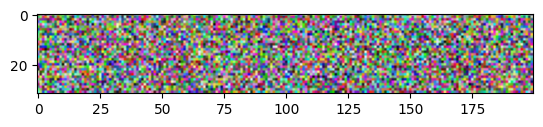

In [3]:
import matplotlib.pyplot as plt
plt.imshow(input_frames[0,:,:,0])

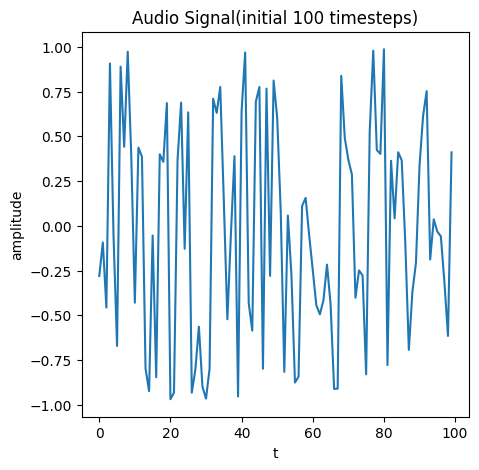

In [4]:
plt.figure(figsize=(5, 5))
plt.plot(range(100), input_audio[0,:100])
plt.xlabel('t')
plt.ylabel('amplitude')
plt.title('Audio Signal(initial 100 timesteps)')
plt.show()

## [**Gated Separable 3D Network**](https://openaccess.thecvf.com/content_ECCV_2018/papers/Saining_Xie_Rethinking_Spatiotemporal_Feature_ECCV_2018_paper.pdf)
> * The paper has used 3 different networks for learning the representations from video clips for video, audio and text.
> * One of them is Gate Separable 3D Network (S3DG)
> * We have used the [pretrained model](https://tfhub.dev/deepmind/mmv/s3d/1.) for testing a test sample and observing its learned representation.
> * The Pretext Task here is that,
>> 1. Maximize the dot-product value of instance (be it text, audio, video, image) from same clip and
>> 2. Minimize the dot-product value between instances belonging to different clips

In [5]:
module = hub.load("https://www.kaggle.com/models/deepmind/mmv/TensorFlow1/s3d/1")

In [6]:
vision_output = module.signatures['video'](tf.constant(tf.cast(input_frames, dtype=tf.float32)))
audio_output = module.signatures['audio'](tf.constant(tf.cast(input_audio, dtype=tf.float32)))
text_output = module.signatures['text'](tf.constant(input_words))

In [7]:
# Text versus video.
video_embedding = vision_output['vat']
text_embedding = text_output['vat']
print(video_embedding.shape)
print(text_embedding.shape)
# We compute all the pairwise similarity scores between video and text.
sim_matrix = tf.matmul(text_embedding, video_embedding, transpose_b=True)
print(sim_matrix)

(1, 256)
(1, 256)
tf.Tensor([[2027.7017]], shape=(1, 1), dtype=float32)


In [8]:
# Audio versus text.
text_embedding = text_output['vat']
audio_embedding = audio_output['vat']
print(text_embedding.shape)
print(audio_embedding.shape)
# We compute all the pairwise similarity scores between audio and text.
sim_matrix = tf.matmul(audio_embedding, text_embedding, transpose_b=True)
print(sim_matrix)

(1, 256)
(1, 256)
tf.Tensor([[-5422.6357]], shape=(1, 1), dtype=float32)


In [9]:
# Audio versus video.
video_embedding = vision_output['va']
audio_embedding = audio_output['va']
print(video_embedding.shape)
print(audio_embedding.shape)
# We compute all the pairwise similarity scores between video and audio.
sim_matrix = tf.matmul(audio_embedding, video_embedding, transpose_b=True)
print(sim_matrix)

(1, 512)
(1, 512)
tf.Tensor([[6083.844]], shape=(1, 1), dtype=float32)


## [**Temporal Shift Module**](https://openaccess.thecvf.com/content_ICCV_2019/papers/Lin_TSM_Temporal_Shift_Module_for_Efficient_Video_Understanding_ICCV_2019_paper.pdf)
> * We have used the [pretrained model](https://tfhub.dev/deepmind/mmv/tsm-resnet50/1) for testing a test sample and observing its learned representation

In [10]:
module = hub.load("https://www.kaggle.com/models/deepmind/mmv/TensorFlow1/tsm-resnet50/1")

In [11]:
vision_output = module.signatures['video'](tf.constant(tf.cast(input_frames, dtype=tf.float32)))
audio_output = module.signatures['audio'](tf.constant(tf.cast(input_audio, dtype=tf.float32)))
text_output = module.signatures['text'](tf.constant(input_words))

In [12]:
# Text versus video.
video_embedding = vision_output['vat']
text_embedding = text_output['vat']
print(video_embedding.shape)
print(text_embedding.shape)
# We compute all the pairwise similarity scores between video and text.
sim_matrix = tf.matmul(text_embedding, video_embedding, transpose_b=True)
print(sim_matrix)

(1, 256)
(1, 256)
tf.Tensor([[480.0114]], shape=(1, 1), dtype=float32)


In [13]:
# Audio versus text.
text_embedding = text_output['vat']
audio_embedding = audio_output['vat']
print(text_embedding.shape)
print(audio_embedding.shape)
# We compute all the pairwise similarity scores between audio and text.
sim_matrix = tf.matmul(audio_embedding, text_embedding, transpose_b=True)
print(sim_matrix)

(1, 256)
(1, 256)
tf.Tensor([[-5046.121]], shape=(1, 1), dtype=float32)


In [14]:
# Audio versus video.
video_embedding = vision_output['va']
audio_embedding = audio_output['va']
print(video_embedding.shape)
print(audio_embedding.shape)
# We compute all the pairwise similarity scores between video and audio.
sim_matrix = tf.matmul(audio_embedding, video_embedding, transpose_b=True)
print(sim_matrix)

(1, 512)
(1, 512)
tf.Tensor([[6172.853]], shape=(1, 1), dtype=float32)


## [**Temporal Shift Module with ResNet 50X2**](https://openaccess.thecvf.com/content_CVPR_2019/papers/Kolesnikov_Revisiting_Self-Supervised_Visual_Representation_Learning_CVPR_2019_paper.pdf)
> * We have used the [pretrained model](https://tfhub.dev/deepmind/mmv/tsm-resnet50x2/1) for testing a test sample and observing its learned representation

In [15]:
module = hub.load("https://www.kaggle.com/models/deepmind/mmv/TensorFlow1/tsm-resnet50x2/1")

In [16]:
vision_output = module.signatures['video'](tf.constant(tf.cast(input_frames, dtype=tf.float32)))
audio_output = module.signatures['audio'](tf.constant(tf.cast(input_audio, dtype=tf.float32)))
text_output = module.signatures['text'](tf.constant(input_words))

In [17]:
# Text versus video.
video_embedding = vision_output['vat']
text_embedding = text_output['vat']
print(video_embedding.shape)
print(text_embedding.shape)
# We compute all the pairwise similarity scores between video and text.
sim_matrix = tf.matmul(text_embedding, video_embedding, transpose_b=True)
print(sim_matrix)

(1, 256)
(1, 256)
tf.Tensor([[854.9652]], shape=(1, 1), dtype=float32)


In [18]:
# Audio versus text.
text_embedding = text_output['vat']
audio_embedding = audio_output['vat']
print(text_embedding.shape)
print(audio_embedding.shape)
# We compute all the pairwise similarity scores between audio and text.
sim_matrix = tf.matmul(audio_embedding, text_embedding, transpose_b=True)
print(sim_matrix)

(1, 256)
(1, 256)
tf.Tensor([[-50874.883]], shape=(1, 1), dtype=float32)


In [19]:
# Audio versus video.
video_embedding = vision_output['va']
audio_embedding = audio_output['va']
print(video_embedding.shape)
print(audio_embedding.shape)
# We compute all the pairwise similarity scores between video and audio.
sim_matrix = tf.matmul(audio_embedding, video_embedding, transpose_b=True)
print(sim_matrix)

(1, 512)
(1, 512)
tf.Tensor([[12556.799]], shape=(1, 1), dtype=float32)


### **Observations**:
> * All three models created embeddings of visual, audio and textual data in shared spaces.
> * The embeddings are created in two spaces *va* and *vat*.
> * The embeddings in *va* are shared between visual and audio data.
> * *va* creates 512-dimensional embedded vector.
> * The embeddings in *vat* are shared between visual, audio, and textual data, however the granularity of different formats is taken into consideration.
> * *vat* creates 256-dimensional embedded vector
> * The granularity is taken into consideration by first creating embedding in shared space between visual and audio data (fine grained) and then projecting it in the space of textual data (coarse grained).

## **Conclusion**
> * The paper conducts self-supervised training to build *versatile* networks for *vision*, *audio* and *language*
> * The technique create embedding of visual, audio, and textual data in a shared space for easy comparison between any of the three modalities and considering their respective granularities
y